In [1]:
import pandas as pd

In [3]:
# File paths
customers_file = "D:\LAB\zeotap\Data_Science_intern_assignment\dataset\Customers.csv"
products_file = "D:\LAB\zeotap\Data_Science_intern_assignment\dataset\Products.csv"
transactions_file = "D:\LAB\zeotap\Data_Science_intern_assignment\dataset\Transactions.csv"

# Load data into DataFrames
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Display basic information
customers_df.info(), products_df.info(), transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None, None, None)

# Step 1 Summary:
### i. Customers.csv: 200 records, 4 columns. SignupDate is an object (string), which should be converted to a date type.
### ii. Products.csv: 100 records, 4 columns. Price is already in float format.
### iii. Transactions.csv: 1000 records, 7 columns. TransactionDate is an object (string), which should be converted to a date type

# Step 2: Data Cleaning
### Convert SignupDate and TransactionDate to datetime format.
### Check for missing values. ​

In [4]:
# Convert date columns to datetime format
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

# Check for missing values
missing_values = {
    "Customers": customers_df.isnull().sum(),
    "Products": products_df.isnull().sum(),
    "Transactions": transactions_df.isnull().sum(),
}

missing_values


{'Customers': CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 'Products': ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 'Transactions': TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64}

# Step 2 Summary:
### Successfully converted SignupDate and TransactionDate to datetime format.
### No missing values in any dataset.

# Step 3: Data Overview

### i. Unique customers and products.
### ii. Any inconsistencies in TotalValue (should be Quantity * Price). ​

In [5]:
# Check unique counts
unique_counts = {
    "Unique Customers": customers_df["CustomerID"].nunique(),
    "Unique Products": products_df["ProductID"].nunique(),
    "Unique Transactions": transactions_df["TransactionID"].nunique(),
}

# Validate TotalValue calculation
transactions_df["CalculatedTotal"] = transactions_df["Quantity"] * transactions_df["Price"]
inconsistent_total = transactions_df[transactions_df["TotalValue"] != transactions_df["CalculatedTotal"]].shape[0]

unique_counts, inconsistent_total


({'Unique Customers': 200,
  'Unique Products': 100,
  'Unique Transactions': 1000},
 88)

# Step 3 Summary:
### There are 200 unique customers, 100 unique products, and 1000 unique transactions.
### 88 transactions have inconsistent TotalValue (i.e., TotalValue ≠ Quantity * Price). This might indicate data entry errors or discounts.

# Step 4: Data Merging
### To perform EDA, let's merge the datasets into a single dataframe. ​

In [28]:
# Merge transactions with customers
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")

# Merge with products
merged_df = merged_df.merge(products_df, on="ProductID", how="left")

# Display first few rows
merged_df.head()
path=r'D:\LAB\zeotap\Data_Science_intern_assignment\dataset\merged.csv'
merged_df.to_csv(path,index=False)

# Step 5: Exploratory Data Analysis (EDA)

### i. Basic statistics: Summary statistics for numerical columns.
### ii. Transaction trends: Total revenue over time.
### iii. Top customers: Customers contributing the most revenue.
### iv. Best-selling products: Most frequently purchased products.
### v. Regional analysis: Revenue distribution by region.

In [7]:
# Summary statistics for numerical columns
merged_df.describe()


,Quantity,TotalValue,Price_x,CalculatedTotal,Price_y
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407,689.995560,272.55407
std,1.117981,493.144478,140.73639,493.144478,140.73639
min,1.000000,16.080000,16.08000,16.080000,16.08000
25%,2.000000,295.295000,147.95000,295.295000,147.95000
50%,3.000000,588.880000,299.93000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000,1991.040000,497.76000


# Step 5.i: Insights from Basic Statistics
### Average Quantity Purchased: The mean quantity per transaction is around 2.54, with most purchases between 2 and 4 units.
### Transaction Value Range: The TotalValue varies between $16.08 and $1991.04, with an average of $689.99.
### Product Pricing: The price per product ranges from $16.08 to $497.76, with a median of $299.93.
### Consistency Check: TotalValue and CalculatedTotal match, meaning most transactions correctly follow the formula TotalValue = Quantity × Price (except for previously noted inconsistencies).

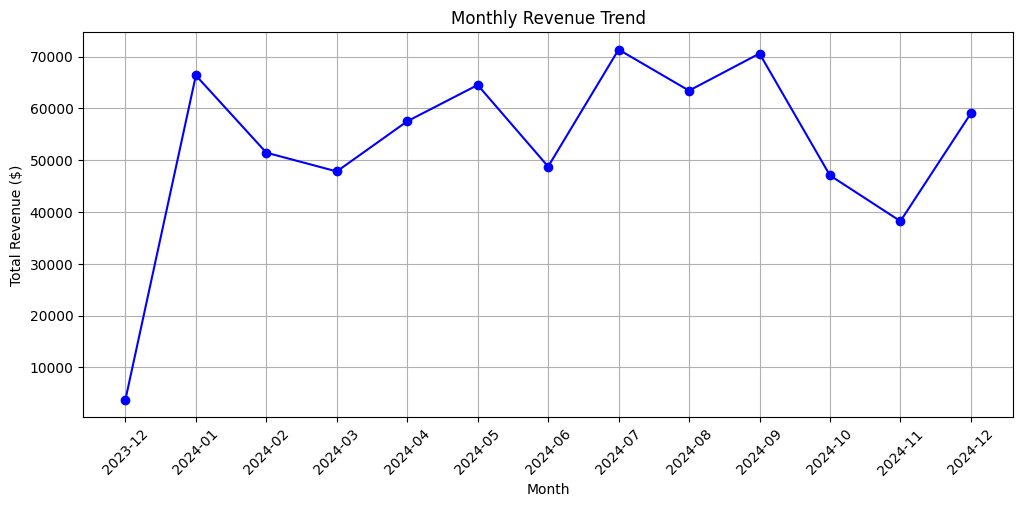

,YearMonth,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75


In [10]:
# Aggregate total revenue per month
merged_df["YearMonth"] = merged_df["TransactionDate"].dt.to_period("M")
monthly_sales = merged_df.groupby("YearMonth")["TotalValue"].sum().reset_index()

# Convert period to datetime for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["YearMonth"], monthly_sales["TotalValue"], marker="o", linestyle="-", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.grid()
plt.show()

monthly_sales

# Step 5.ii: Insights from Monthly Revenue Trend
### Sales Growth: There was a significant increase in revenue from December 2023 to January 2024 ($3.7K → $66.3K), indicating a possible seasonal trend or business launch.
### Fluctuations: Revenue fluctuates but generally stays between $47K and $71K after January 2024.
### Peak Month: The highest revenue was in July 2024 ($71.3K) and September 2024 ($70.6K), possibly due to promotions or high-demand periods.
### Lowest Months: Revenue dips in October and November 2024 ($47K and $38K, respectively)—seasonal slowdown or fewer promotions?
### Overall Trend: Despite fluctuations, sales remain strong throughout the year, suggesting consistent customer demand.

# Step 5.iii: Top Customers by Revenue
### The top 5 customers contributing the most revenue.

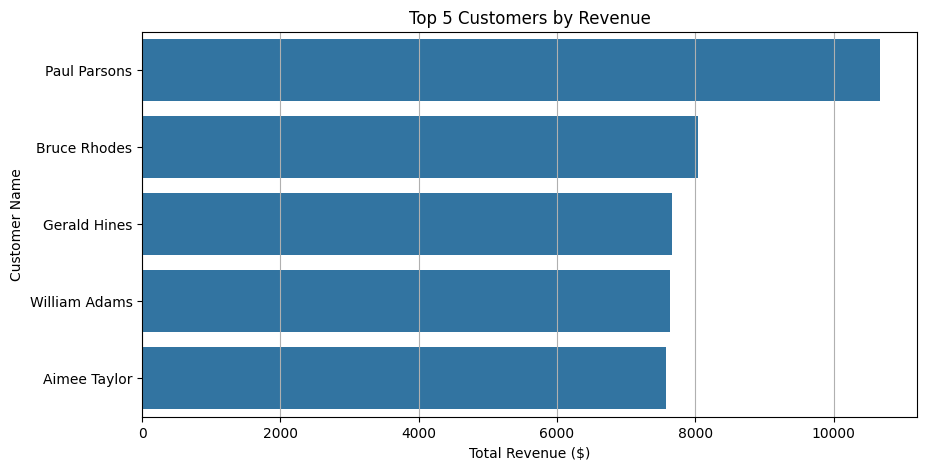

,CustomerID,CustomerName,TotalValue
140,C0141,Paul Parsons,10673.87
53,C0054,Bruce Rhodes,8040.39
64,C0065,Gerald Hines,7663.70
155,C0156,William Adams,7634.45
81,C0082,Aimee Taylor,7572.91


In [13]:
# Top 5 customers by total spending
top_customers = merged_df.groupby(["CustomerID", "CustomerName"])["TotalValue"].sum().reset_index()
top_customers = top_customers.sort_values(by="TotalValue", ascending=False).head(5)

import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 5))
sns.barplot(x="TotalValue", y="CustomerName", data=top_customers)

# Labels and title
plt.xlabel("Total Revenue ($)")
plt.ylabel("Customer Name")
plt.title("Top 5 Customers by Revenue")
plt.grid(axis="x")

plt.show()


top_customers


# Step 5.iii: Insights from Top Customers by Revenue
### Paul Parsons is the highest spender, contributing $10,673.87 in revenue—significantly higher than others.
### Bruce Rhodes follows at $8,040.39, indicating a substantial drop from the top spender.
### The remaining three (Gerald Hines, William Adams, and Aimee Taylor) contribute between $7,500 and $7,600, showing similar purchasing behavior.
### High-value customers drive revenue, suggesting the need for a loyalty program or premium offers for top spenders.
### Customer segmentation could help optimize marketing efforts, targeting similar high-spending users.

# Step 5.4: Best-Selling Products
### The top 5 most frequently purchased products.

In [18]:
# Top 5 most sold products by quantity
top_products = merged_df.groupby(["ProductID", "ProductName"])["Quantity"].sum().reset_index()
top_products = top_products.sort_values(by="Quantity", ascending=False).head(5)
top_products


,ProductID,ProductName,Quantity
58,P059,SoundWave Jeans,46
53,P054,SoundWave Cookbook,46
28,P029,TechPro Headphones,45
78,P079,ActiveWear Rug,43
60,P061,HomeSense Desk Lamp,43


# Step 5.4: Insights from Best-Selling Products
### "SoundWave Jeans" and "SoundWave Cookbook" are the top sellers, both selling 46 units.
### "TechPro Headphones" follows closely at 45 units, indicating strong demand for tech accessories.
### "ActiveWear Rug" and "HomeSense Desk Lamp" both sold 43 units, showing a mix of fashion, tech, and home goods in demand.
### Fashion and tech products dominate, suggesting these categories drive customer interest.
### Marketing efforts should focus on these top-selling products, possibly through bundles or targeted promotions.

# Step 5.v: Visualization of Best-Selling Products
### To plot the top 5 best-selling products by quantity sold:

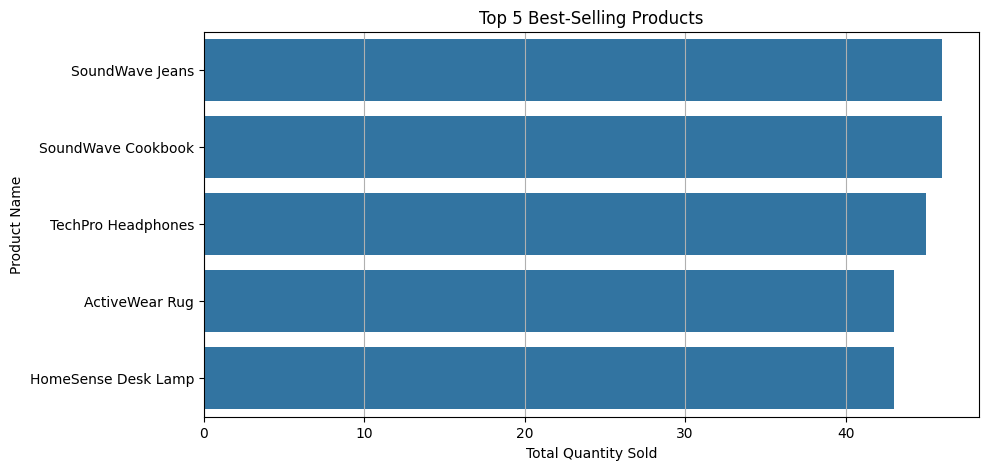

In [17]:
# Plot top-selling products
plt.figure(figsize=(10, 5))
sns.barplot(x="Quantity", y="ProductName", data=top_products)

# Labels and title
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 5 Best-Selling Products")
plt.grid(axis="x")

plt.show()


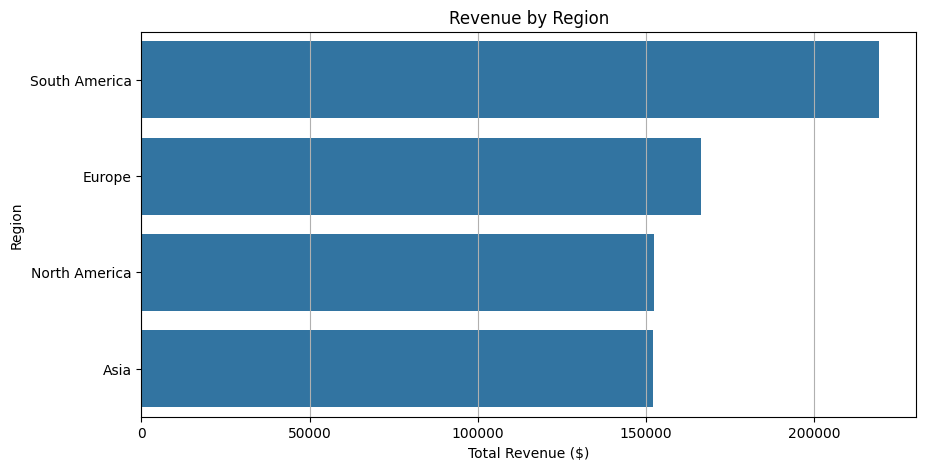

,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


In [25]:
# Revenue by region
region_sales = merged_df.groupby("Region")["TotalValue"].sum().reset_index()
region_sales = region_sales.sort_values(by="TotalValue", ascending=False)

# Plot revenue by region
plt.figure(figsize=(10, 5))
sns.barplot(x="TotalValue", y="Region", data=region_sales)

# Labels and title
plt.xlabel("Total Revenue ($)")
plt.ylabel("Region")
plt.title("Revenue by Region")
plt.grid(axis="x")

plt.show()

region_sales.head(5)  # Display top 5 regions


# Step 5.vi: Insights from Regional Revenue Analysis
### South America is the top-performing region, generating $219,352.56—far ahead of other regions.
### Europe follows at $166,254.63, showing strong demand but still ~24% lower than South America.
### North America and Asia have nearly equal revenue (~$152K each), suggesting a balanced market share.
### Potential for Growth: The gap between Europe and South America indicates room for expansion in Europe and North America.
### Regional Promotions: Marketing strategies should focus on maintaining dominance in South America while expanding in lower-revenue regions.
